**Portfolio Optimization**

# Getting Data #


In [157]:

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

import yfinance as yf

In [2]:
index_data=pd.read_csv('niftypharma.csv')
index_data=index_data.drop(['Unnamed: 2'],axis=1)
index_data['Time']= pd.to_datetime(index_data['Time']).dt.date
index_data['NIFTYPHARMA'] = index_data['NIFTYPHARMA'].str.replace(",","").astype(float)

index_data.head()

,Time,NIFTYPHARMA
0,2003-01-01,1034.13
1,2003-01-02,1035.93
2,2003-01-03,1044.19
3,2003-01-06,1054.33
4,2003-01-07,1058.90


In [3]:
index_data.dtypes

Time            object
NIFTYPHARMA    float64
dtype: object

In [4]:

index_data.head()

,Time,NIFTYPHARMA
0,2003-01-01,1034.13
1,2003-01-02,1035.93
2,2003-01-03,1044.19
3,2003-01-06,1054.33
4,2003-01-07,1058.90


In [5]:
index_data['Time'] = pd.to_datetime(index_data['Time'], errors='coerce').dt.date
index_data['NIFTYPHARMA']=index_data['NIFTYPHARMA'].astype(float)
index_data.head()

,Time,NIFTYPHARMA
0,2003-01-01,1034.13
1,2003-01-02,1035.93
2,2003-01-03,1044.19
3,2003-01-06,1054.33
4,2003-01-07,1058.90


In [6]:
index_data_daily = index_data.loc[index_data['NIFTYPHARMA'] > 0]
index_data_daily.set_index('Time', inplace=True)

index_data_daily

# index_data_daily['DateTime'] = pd.to_datetime(index_data['DateTime']).dt.date
# index_data_daily.set_index('DateTime', inplace=True)
# # index_data_daily.index = pd.to_datetime(index_data.index)
# # #converts index to datetime data
# #
# index_data_monthly=index_data_daily.resample('1M').mean()#-> resample with one month



,NIFTYPHARMA
Time,
2003-01-01,1034.13
2003-01-02,1035.93
2003-01-03,1044.19
2003-01-06,1054.33
2003-01-07,1058.90
...,...
2021-07-02,14470.90
2021-07-02,14516.55
2021-07-02,14514.15


In [7]:
# start = index_data_daily.index.searchsorted(dt.datetime(2016, 1, 1))
# end   = index_data_daily.index.searchsorted(dt.datetime(2013, 12, 31))
index_data_daily.index = pd.to_datetime(index_data_daily.index)

index_data_daily=index_data_daily['20160101':'20201231']


index_data_monthly=index_data_daily.resample('1M').mean()
index_data_daily

,NIFTYPHARMA
Time,
2016-01-01,11979.85
2016-01-04,11733.70
2016-01-05,11741.50
2016-01-06,11673.80
2016-01-07,11451.65
...,...
2020-12-24,12908.95
2020-12-28,12874.35
2020-12-29,12843.90


In [8]:
index_data_daily.shape
index_data_daily.to_csv('indexdata1.csv')

In [9]:
index_data_daily.head()

,NIFTYPHARMA
Time,
2016-01-01,11979.85
2016-01-04,11733.70
2016-01-05,11741.50
2016-01-06,11673.80
2016-01-07,11451.65


**Index data is loaded and plotted**

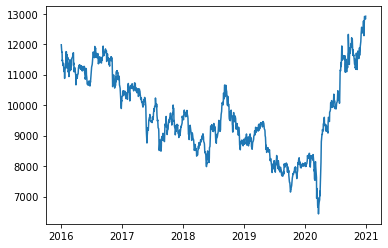

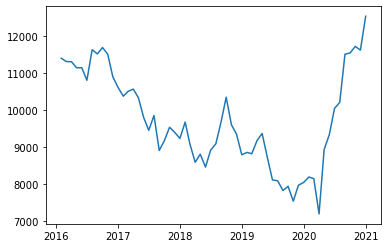

In [10]:
# plt.figure(figsize=(16,12))
plt.plot(index_data_daily['NIFTYPHARMA'],label='NSE PHARMA Daily')
plt.show()
plt.plot(index_data_monthly['NIFTYPHARMA'],label='NSE PHARMA Monthly')
plt.show()

In [11]:
index_data_daily.shape

(1231, 1)

In [12]:
stocks=pd.read_csv('ind_niftypharmalist.csv')
stocks

,Company,weight
0,ALKEM,3.53
1,AUROPHARMA,7.91
2,BIOCON,4.86
3,CADILAHC,4.46
4,CIPLA,13.60
5,DIVISLAB,15.07
6,DRREDDY,18.17
7,LUPIN,8.27
8,SUNPHARMA,20.34
9,TORNTPHARM,3.79


**Retriving Data for stocks from Yahoo Finance**

In [13]:


stocks=pd.read_csv('ind_niftypharmalist.csv')
symbols=list(stocks['Company'])
# print(symbols)

import time
import datetime
import pandas as pd

ticker = symbols

period1 = int(time.mktime(datetime.datetime(2016, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2020, 12, 31, 23, 59).timetuple()))
interval = '1d' # 1d, 1mo

# query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker[9]}.NS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
# df = pd.read_csv(query_string)
# df

for x in range(len(ticker)):
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker[x]}.NS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    exec(f'{ticker[x]} = pd.read_csv(query_string)')
  



for stock in ticker:
    globals()[stock]=globals()[stock].loc[:,('Date','Close')]
    globals()[stock].set_index('Date', inplace=True)
    globals()[stock].index=pd.to_datetime(globals()[stock].index)
    

In [14]:
ALKEM.head()

,Close
Date,
2016-01-01,1503.099976
2016-01-04,1530.150024
2016-01-05,1567.699951
2016-01-06,1527.000000
2016-01-07,1467.349976


In [15]:
index_data_daily.index.names = ['Date']
index_data_monthly.index.names=['Date']

In [16]:
df=pd.concat([ALKEM,
 AUROPHARMA,
 BIOCON,
 CADILAHC,
 CIPLA,
 DIVISLAB,
 DRREDDY,
 LUPIN,
 SUNPHARMA,
 TORNTPHARM], axis=1, keys=ticker)
df.columns = df.columns.get_level_values(0)
df

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM
Date,,,,,,,,,,
2016-01-01,1503.099976,881.400024,86.866669,332.700012,655.349976,1162.500000,3108.600098,1845.250000,815.549988,1478.900024
2016-01-04,1530.150024,844.299988,89.033333,320.799988,645.650024,1149.699951,3056.000000,1795.150024,799.099976,1448.349976
2016-01-05,1567.699951,863.500000,89.025002,313.600006,640.849976,1147.500000,3070.649902,1783.050049,800.500000,1435.949951
2016-01-06,1527.000000,867.200012,87.291664,320.750000,652.099976,1137.199951,3046.250000,1753.199951,791.950012,1442.849976
2016-01-07,1467.349976,841.500000,85.216667,306.850006,637.450012,1126.949951,2991.800049,1717.500000,783.799988,1425.000000
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2916.000000,909.000000,481.950012,489.500000,833.200012,3749.600098,5201.799805,976.200012,590.450012,2785.350098
2020-12-28,2916.899902,908.349976,465.799988,487.700012,830.150024,3766.000000,5201.799805,983.750000,586.950012,2795.199951
2020-12-29,2925.300049,905.049988,460.500000,479.350006,827.950012,3784.199951,5165.600098,977.250000,590.599976,2758.800049


In [17]:
df=pd.merge(df,index_data_daily, how='inner', left_index=True, right_index=True)#left and right index is about to join by index

In [18]:
# df=df.rename(columns = {'Nifty Pharma':'NiftyPharma'})

print(type(df.index))
df.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Date,,,,,,,,,,,
2016-01-01,1503.099976,881.400024,86.866669,332.700012,655.349976,1162.500000,3108.600098,1845.250000,815.549988,1478.900024,11979.85
2016-01-04,1530.150024,844.299988,89.033333,320.799988,645.650024,1149.699951,3056.000000,1795.150024,799.099976,1448.349976,11733.70
2016-01-05,1567.699951,863.500000,89.025002,313.600006,640.849976,1147.500000,3070.649902,1783.050049,800.500000,1435.949951,11741.50
2016-01-06,1527.000000,867.200012,87.291664,320.750000,652.099976,1137.199951,3046.250000,1753.199951,791.950012,1442.849976,11673.80
2016-01-07,1467.349976,841.500000,85.216667,306.850006,637.450012,1126.949951,2991.800049,1717.500000,783.799988,1425.000000,11451.65


In [19]:
df.shape
df.dropna(inplace=True)
df.to_csv('file1.csv')

In [20]:
df.isnull().sum()

ALKEM          0
AUROPHARMA     0
BIOCON         0
CADILAHC       0
CIPLA          0
DIVISLAB       0
DRREDDY        0
LUPIN          0
SUNPHARMA      0
TORNTPHARM     0
NIFTYPHARMA    0
dtype: int64

**df=Dataframe of all the stocks and Pharma Index**

In [21]:
# pct_daily_returns = df.pct_change()
# pct_monthly_returns = df.resample('1M').ffill().pct_change()

log_returns = df.pct_change()
pct_monthly_returns = df.resample('M').mean().ffill().pct_change()

## log_returns represents returns compounded

In [22]:
log_returns=log_returns.iloc[1:,:]
log_returns

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Date,,,,,,,,,,,
2016-01-04,0.017996,-0.042092,0.024942,-0.035768,-0.014801,-0.011011,-0.016921,-0.027151,-0.020170,-0.020657,-0.020547
2016-01-05,0.024540,0.022741,-0.000094,-0.022444,-0.007434,-0.001914,0.004794,-0.006740,0.001752,-0.008561,0.000665
2016-01-06,-0.025962,0.004285,-0.019470,0.022800,0.017555,-0.008976,-0.007946,-0.016741,-0.010681,0.004805,-0.005766
2016-01-07,-0.039064,-0.029636,-0.023771,-0.043336,-0.022466,-0.009013,-0.017874,-0.020363,-0.010291,-0.012371,-0.019030
2016-01-08,0.006713,0.003743,0.013397,0.011243,-0.023688,0.002440,0.006317,-0.002707,0.013205,0.010947,0.003052
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.015621,0.022152,-0.003412,0.030526,0.010368,0.016537,-0.004269,0.013339,0.027584,-0.005108,0.012209
2020-12-28,0.000309,-0.000715,-0.033510,-0.003677,-0.003661,0.004374,0.000000,0.007734,-0.005928,0.003536,-0.002680
2020-12-29,0.002880,-0.003633,-0.011378,-0.017121,-0.002650,0.004833,-0.006959,-0.006607,0.006219,-0.013022,-0.002365


<Figure size 936x720 with 0 Axes>

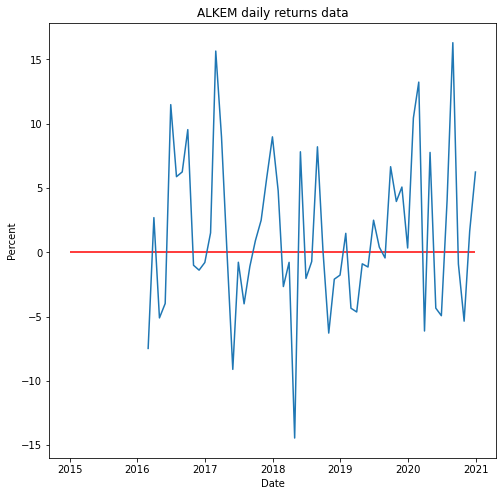

In [23]:
fig = plt.figure(figsize=(13,10))

plt.figure(figsize=(8,8))
plt.plot(pct_monthly_returns.ALKEM*100)
plt.hlines(0,datetime.datetime(2015, 1, 1),datetime.datetime(2020, 12, 31),color='r')

plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("ALKEM daily returns data")
plt.show()

<Figure size 432x288 with 0 Axes>

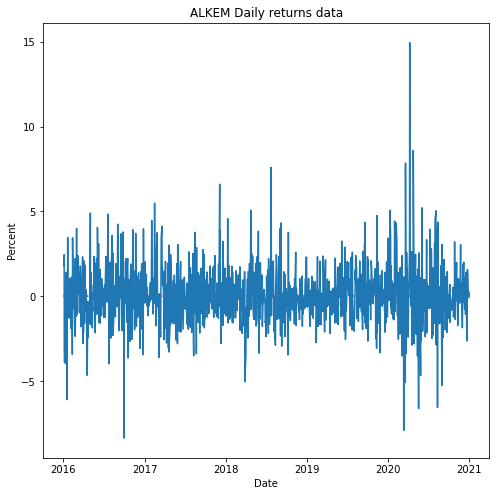

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

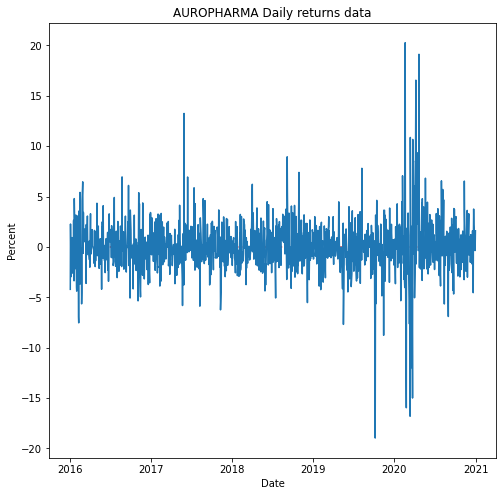

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

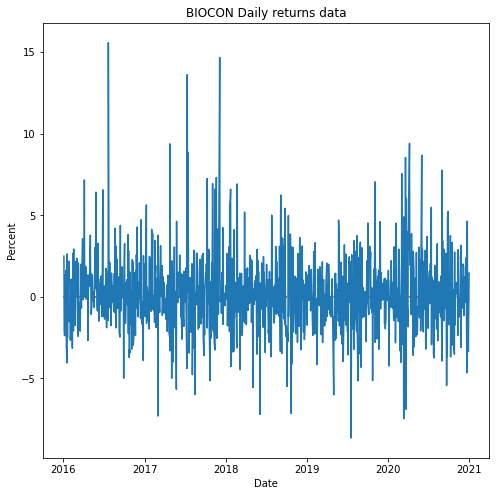

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

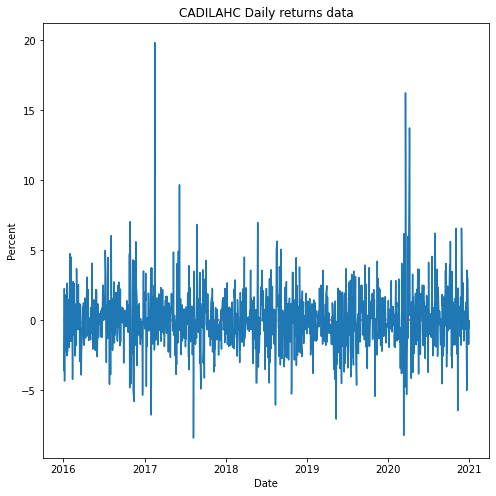

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

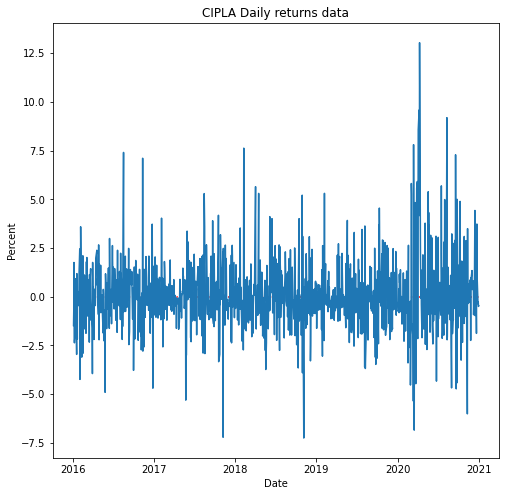

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

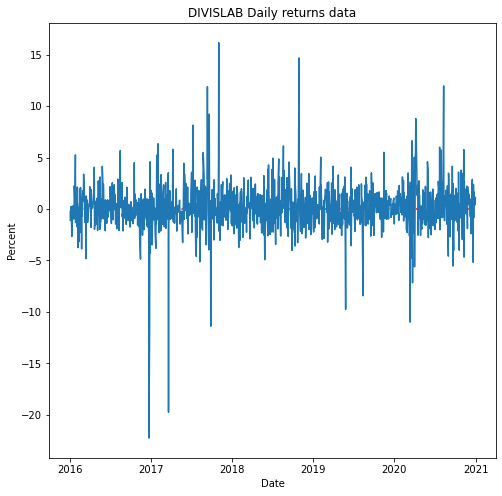

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

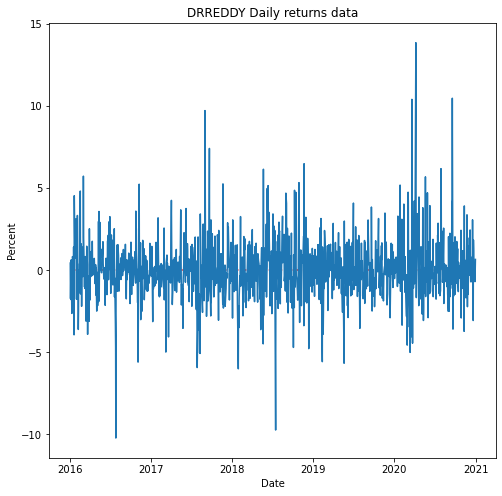

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

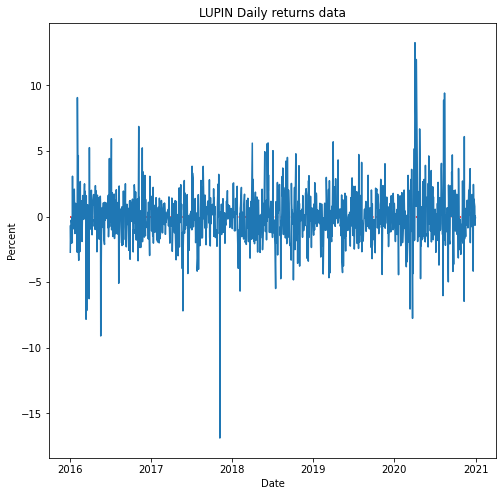

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

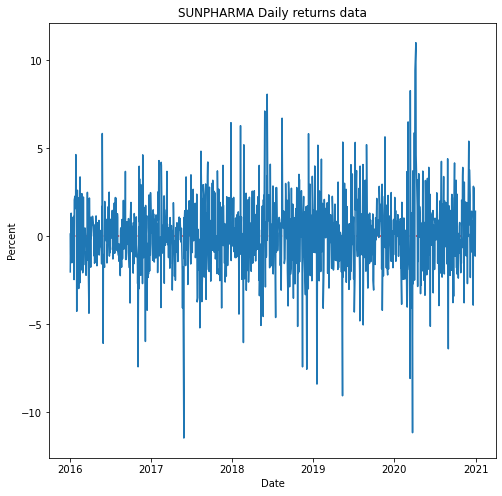

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

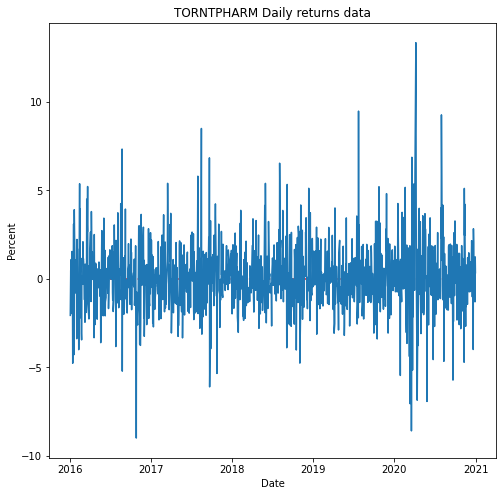

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

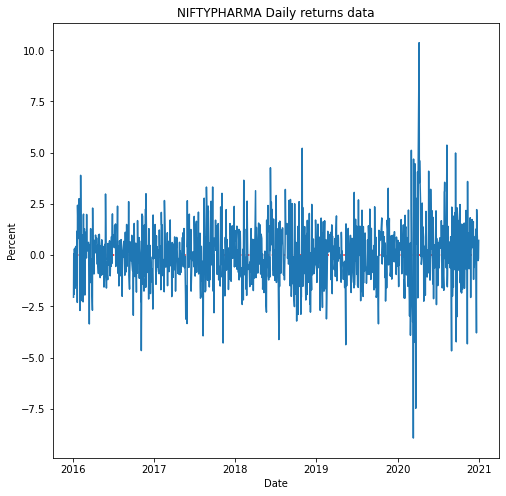

<Figure size 432x288 with 0 Axes>

In [24]:
for stock in log_returns.columns:
    fig = plt.figure()
    
    
    plt.figure(figsize=(8,8))
    plt.plot(log_returns[stock]*100)
    plt.hlines(0,datetime.datetime(2016, 1, 1),datetime.datetime(2020, 12, 31),color='r',linestyles='dotted')
    plt.xlabel("Date")
    plt.ylabel("Percent")
    plt.title(f'{stock} Daily returns data')
    plt.show()
    plt.tight_layout()
    

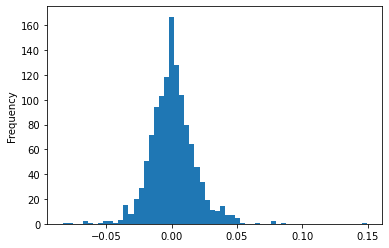

In [27]:
fig = plt.figure()
#ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
log_returns.ALKEM.plot.hist(bins = 60)
# ax1.set_xlabel("Daily returns %")
# ax1.set_ylabel("Percent")
# ax1.set_title("ALKEM daily returns data")

plt.show()

Text(0.5, 1.0, 'Alkem Daily cumulative returns data')

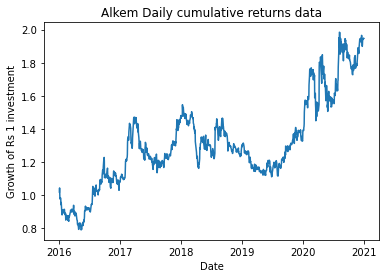

In [28]:
alkem_cum_returns = (log_returns.ALKEM + 1).cumprod()


# ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
# alkem_cum_returns.plot()
plt.plot(alkem_cum_returns)
plt.xlabel("Date")
plt.ylabel("Growth of Rs 1 investment")
plt.title("Alkem Daily cumulative returns data")


## Calculating basic statistics for the data

In [29]:
log_returns.mean()

ALKEM          0.000695
AUROPHARMA     0.000381
BIOCON         0.001619
CADILAHC       0.000527
CIPLA          0.000340
DIVISLAB       0.001235
DRREDDY        0.000589
LUPIN         -0.000320
SUNPHARMA     -0.000043
TORNTPHARM     0.000707
NIFTYPHARMA    0.000160
dtype: float64

In [30]:
log_returns.std()

ALKEM          0.017457
AUROPHARMA     0.026277
BIOCON         0.022450
CADILAHC       0.021783
CIPLA          0.017850
DIVISLAB       0.022599
DRREDDY        0.018456
LUPIN          0.019896
SUNPHARMA      0.020849
TORNTPHARM     0.019302
NIFTYPHARMA    0.014048
dtype: float64

<AxesSubplot:>

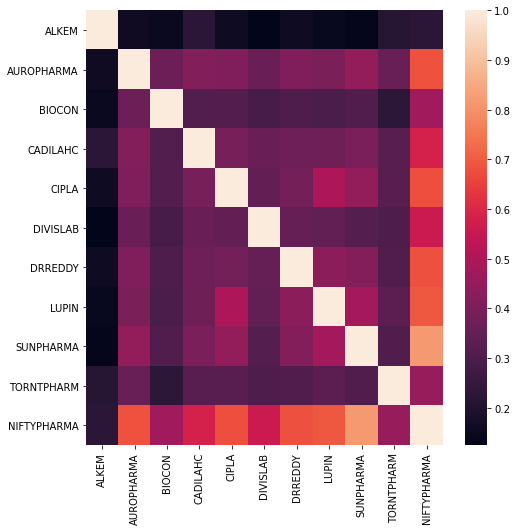

In [31]:
import seaborn as sns

correlation=log_returns.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation)

**log_returns the returns on daily basis as %return/100**

In [25]:
log_returns

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Date,,,,,,,,,,,
2016-01-04,0.017996,-0.042092,0.024942,-0.035768,-0.014801,-0.011011,-0.016921,-0.027151,-0.020170,-0.020657,-0.020547
2016-01-05,0.024540,0.022741,-0.000094,-0.022444,-0.007434,-0.001914,0.004794,-0.006740,0.001752,-0.008561,0.000665
2016-01-06,-0.025962,0.004285,-0.019470,0.022800,0.017555,-0.008976,-0.007946,-0.016741,-0.010681,0.004805,-0.005766
2016-01-07,-0.039064,-0.029636,-0.023771,-0.043336,-0.022466,-0.009013,-0.017874,-0.020363,-0.010291,-0.012371,-0.019030
2016-01-08,0.006713,0.003743,0.013397,0.011243,-0.023688,0.002440,0.006317,-0.002707,0.013205,0.010947,0.003052
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.015621,0.022152,-0.003412,0.030526,0.010368,0.016537,-0.004269,0.013339,0.027584,-0.005108,0.012209
2020-12-28,0.000309,-0.000715,-0.033510,-0.003677,-0.003661,0.004374,0.000000,0.007734,-0.005928,0.003536,-0.002680
2020-12-29,0.002880,-0.003633,-0.011378,-0.017121,-0.002650,0.004833,-0.006959,-0.006607,0.006219,-0.013022,-0.002365


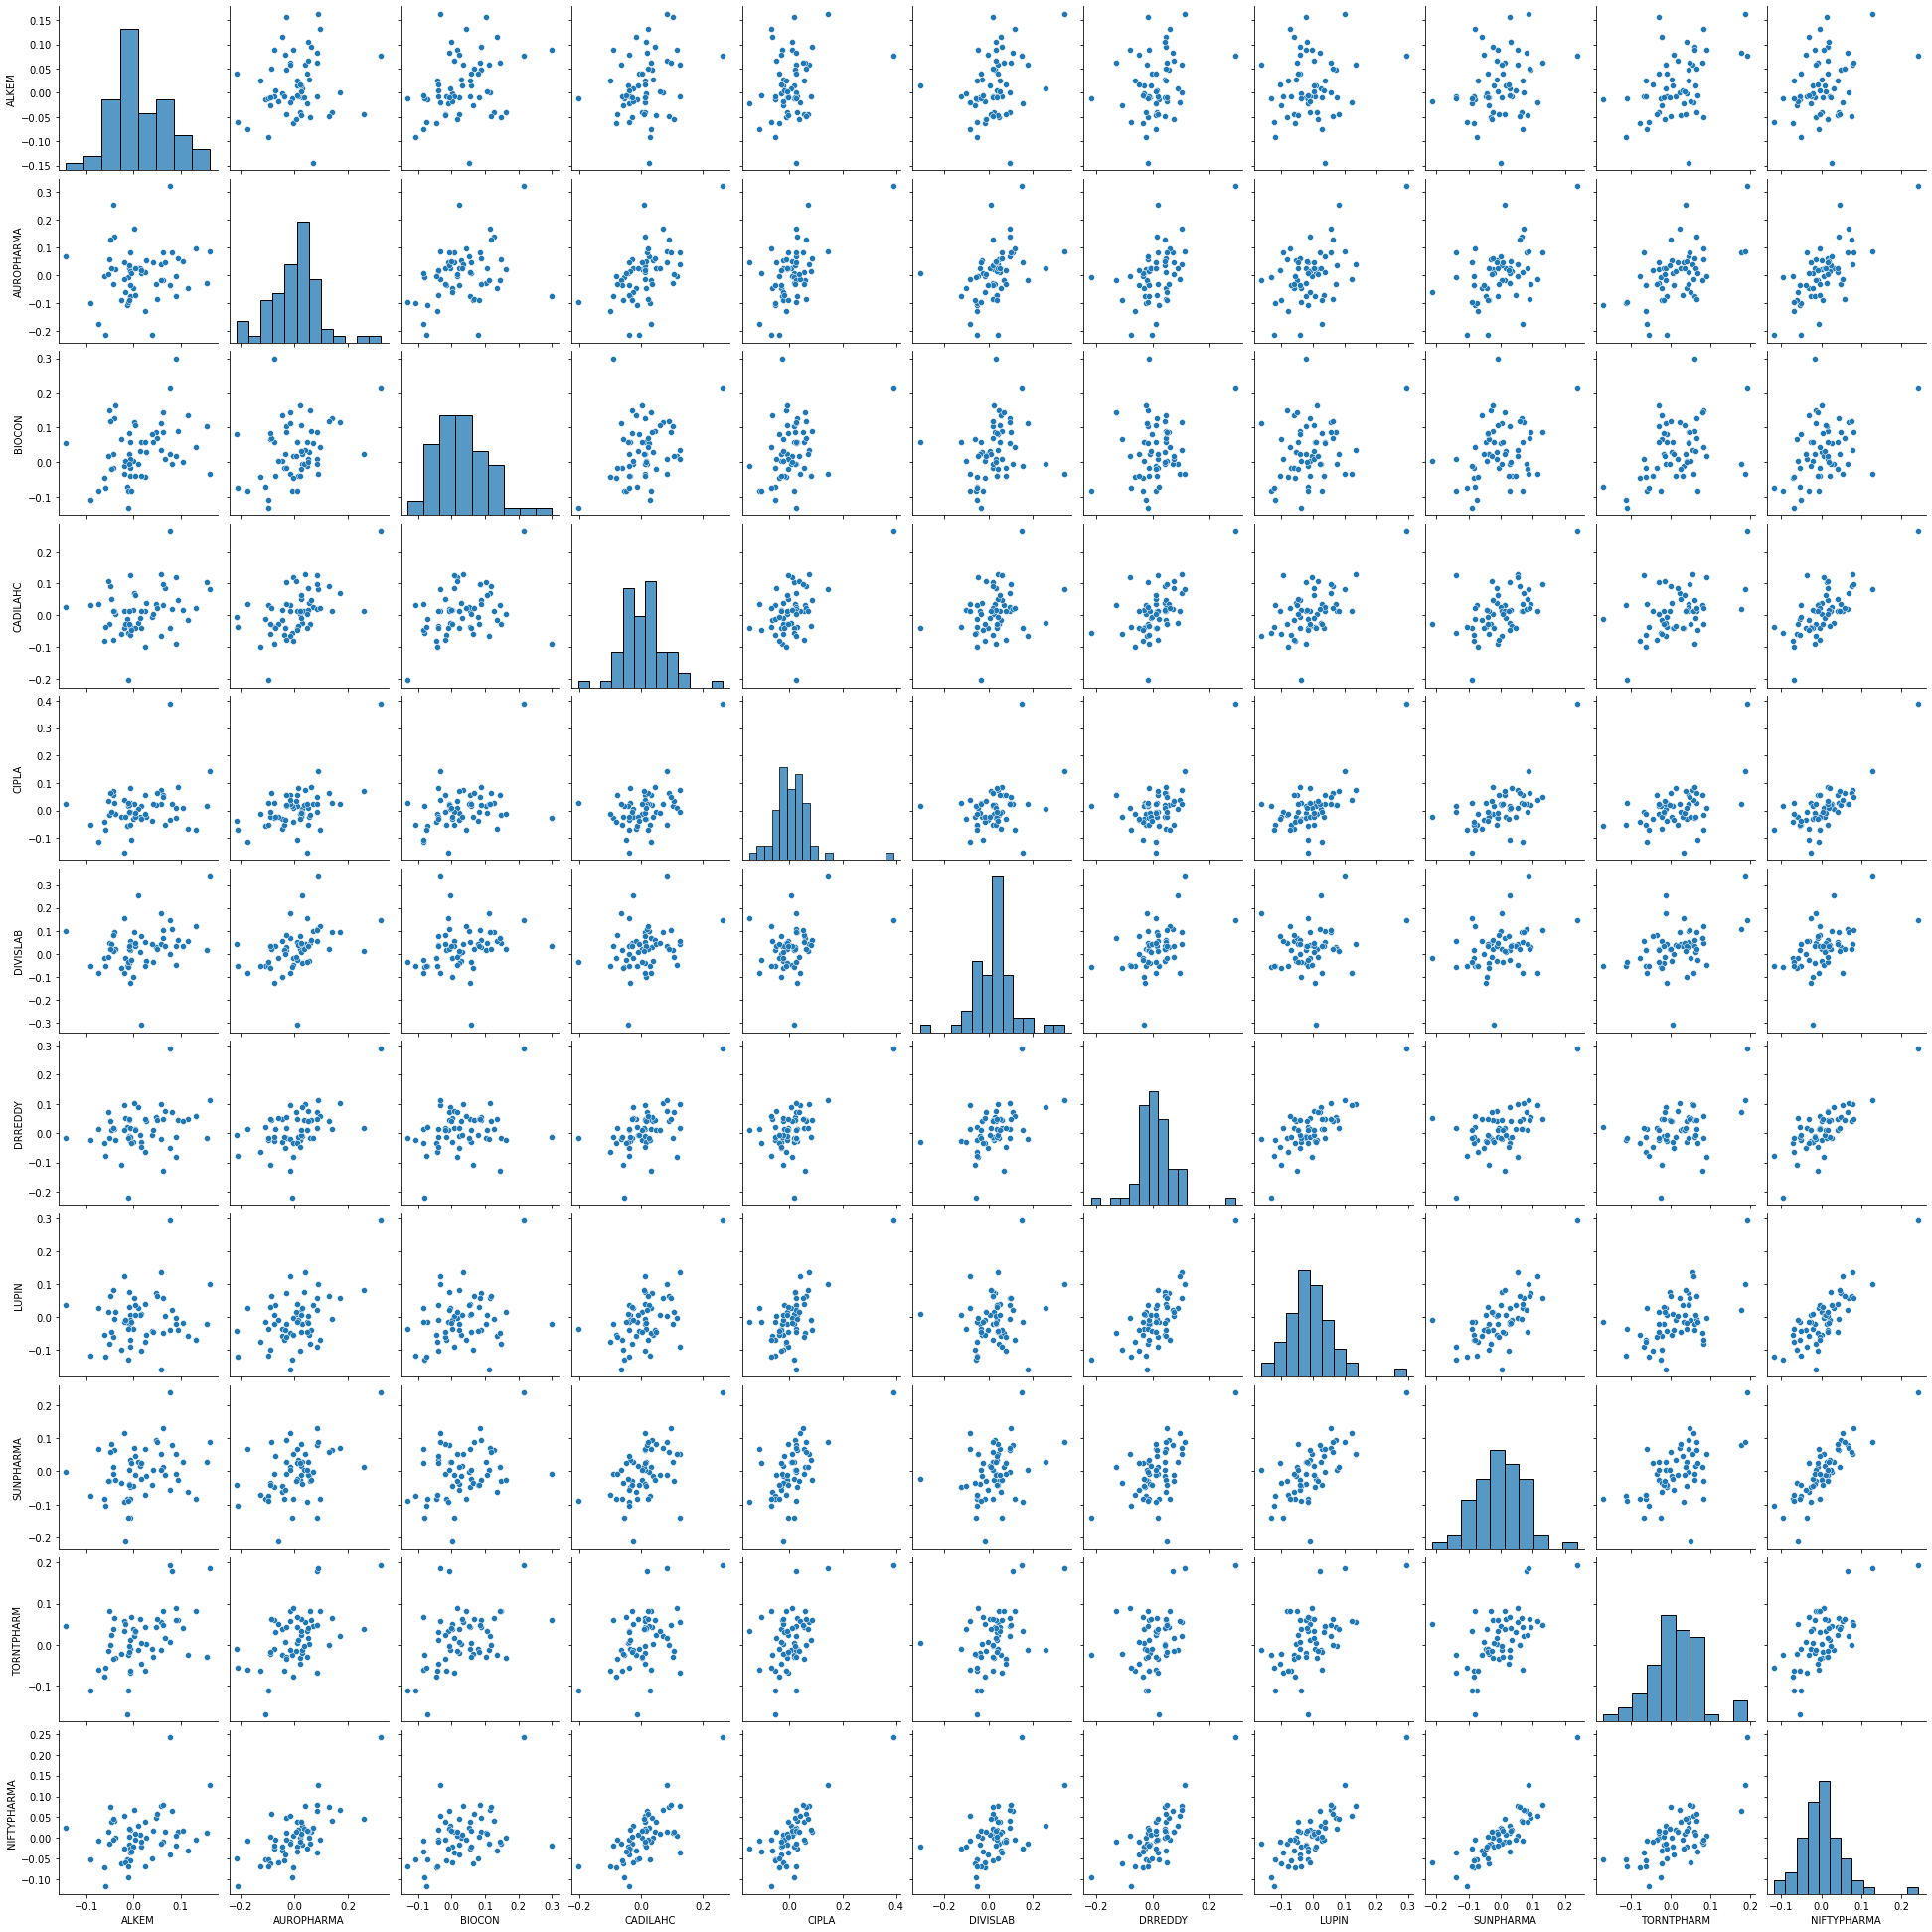

In [35]:
sns.pairplot(data = pct_monthly_returns[1:])

In [33]:
log_returns.drop(log_returns.loc[log_returns['ALKEM']== 0].index, inplace=True)


log_returns.shape

(1221, 11)

In [34]:
log_returns=log_returns[1:]

In [35]:
log_returns.columns

Index(['ALKEM', 'AUROPHARMA', 'BIOCON', 'CADILAHC', 'CIPLA', 'DIVISLAB',
       'DRREDDY', 'LUPIN', 'SUNPHARMA', 'TORNTPHARM', 'NIFTYPHARMA'],
      dtype='object')

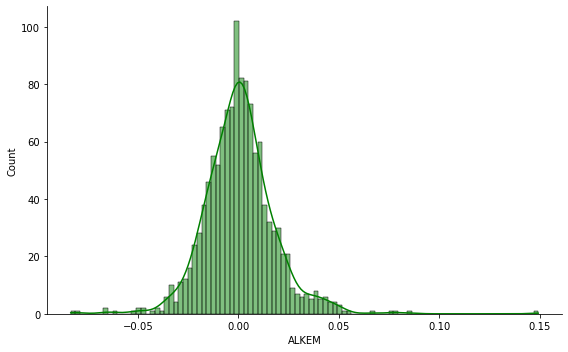

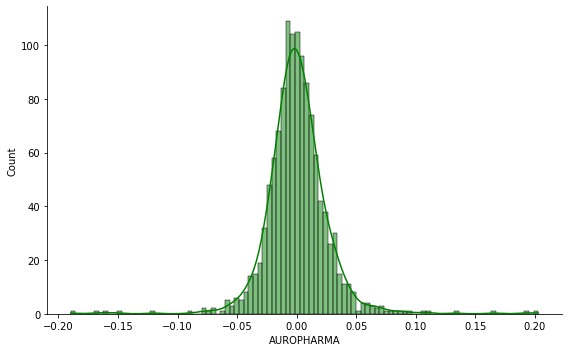

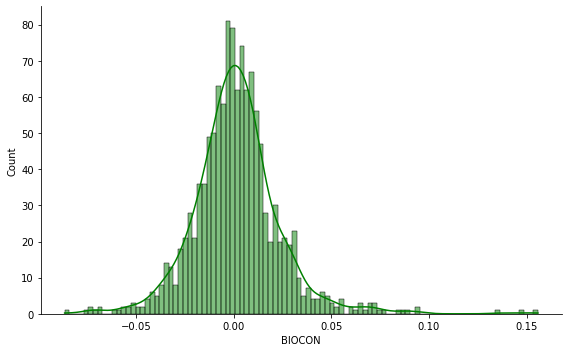

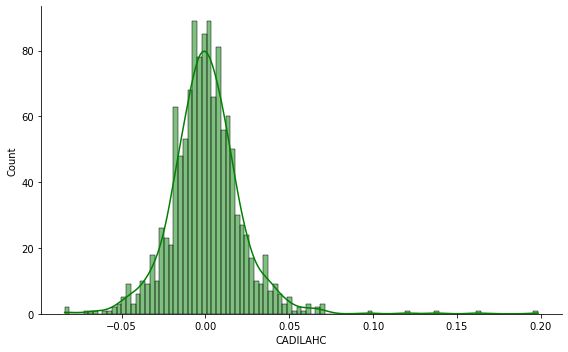

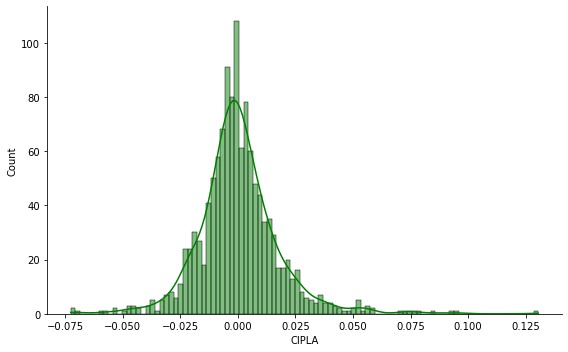

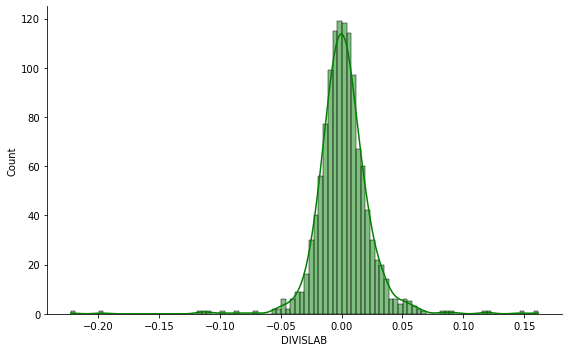

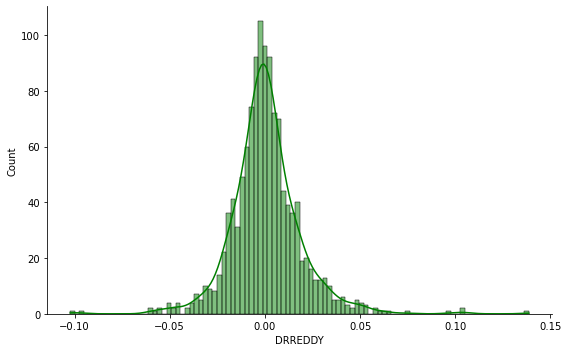

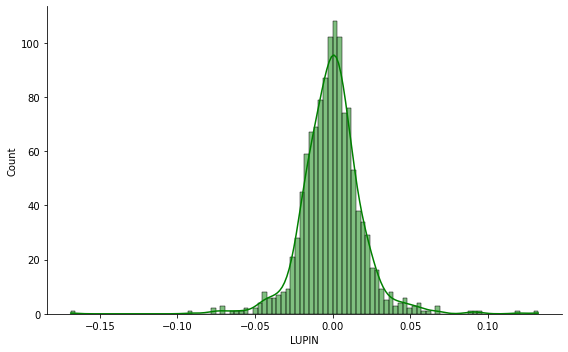

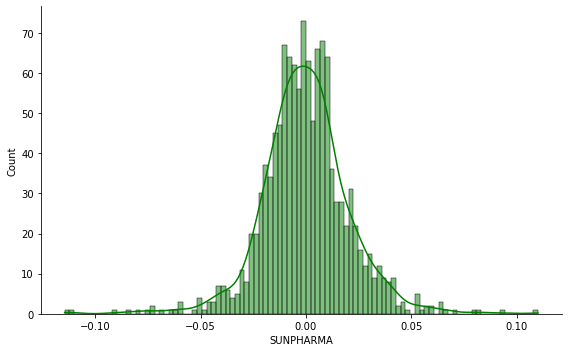

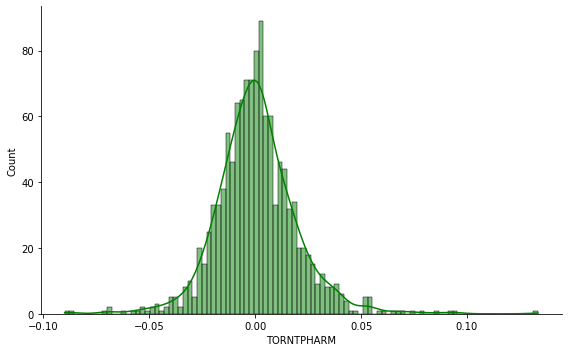

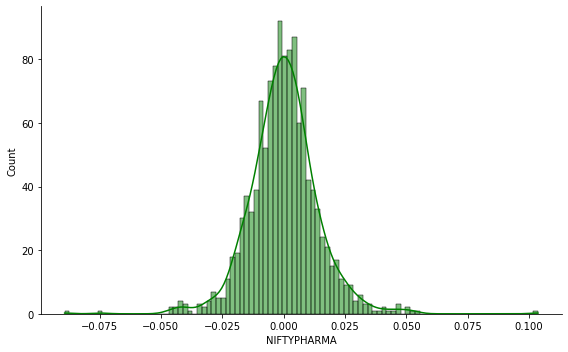

In [37]:
for tick in log_returns.columns:
    sns.displot(log_returns.loc['2016-01-01':'2020-12-31'][tick],color='green',bins=100,height=5, aspect=1.6,kde=True)

In [38]:
pct_monthly_returns=pct_monthly_returns.iloc[1:,:]

## ARIMA

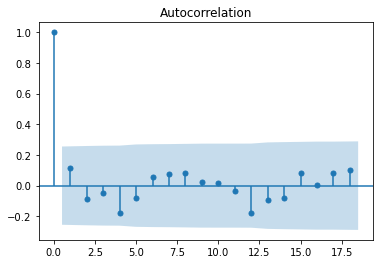

In [39]:

from statsmodels.graphics.tsaplots import plot_acf
series=pct_monthly_returns.ALKEM
plot_acf(series)
plt.show()


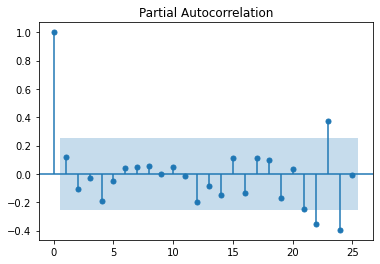

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=25)
plt.show()

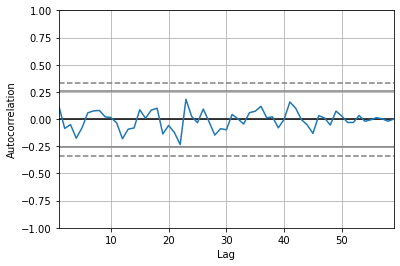

In [41]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(pct_monthly_returns['ALKEM'])
plt.show()

<AxesSubplot:xlabel='Date'>

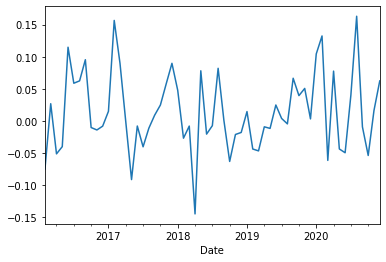

In [42]:
pct_monthly_returns['ALKEM'].plot()

In [48]:
pct_monthly_returns.shape

(59, 12)

In [49]:


import statsmodels.api as sm



model=sm.tsa.statespace.SARIMAX(pct_monthly_returns['ALKEM'],order=(1, 1, 1),seasonal_order=(1,1,1,2))
results=model.fit()



In [52]:
# df1=df
# .resample('1M')
df1 = df
df1=df1.resample('1M').mean()

# df1=df1-df1.shift(1)


In [53]:
df1.drop(df1.loc[df1['ALKEM']== 0].index, inplace=True)
df1=df1.iloc[1:,:]
df1.head()

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Date,,,,,,,,,,,
2016-02-29,1315.792858,684.554766,77.277778,320.576192,540.138094,1017.054766,2997.023821,1767.921433,854.114287,1314.790487,11306.542857
2016-03-31,1351.227490,723.220007,79.497083,333.122499,526.967490,986.972501,3122.464990,1673.175000,842.380002,1318.682507,11301.255000
2016-04-30,1282.188904,764.461107,91.263888,323.705558,519.486109,1035.002777,3071.755534,1537.230550,817.099996,1427.311096,11138.088889
2016-05-31,1231.054549,781.213634,106.144697,324.611363,513.945450,1059.104550,2999.709106,1558.731812,796.809088,1382.965898,11138.102273
2016-06-30,1372.424999,746.888639,120.568181,319.561360,480.531820,1119.579557,3142.618186,1467.299993,748.604539,1350.243181,10799.813636


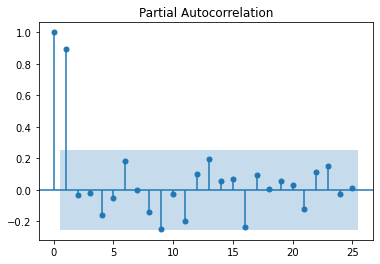

In [54]:
series=df1.ALKEM

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=25)
plt.show()

In [55]:
from statsmodels.tsa.stattools import adfuller


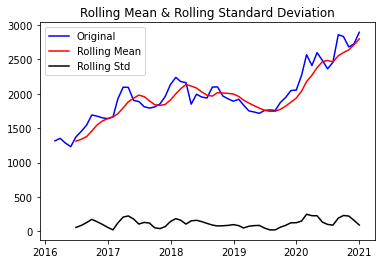

In [56]:
rolling_mean = series.rolling(window = 5).mean()
rolling_std = series.rolling(window = 5).std()
plt.plot(series, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [57]:
result = adfuller(series)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.6669520095121966
p-value: 0.8551250413593385
Critical Values:
	1%: -3.548493559596539
	5%: -2.912836594776334
	10%: -2.594129155766944


In [58]:
from statsmodels.tsa.arima.model import ARIMA
series=df1.ALKEM
# series.index = series.index.to_period('M')

model = ARIMA(series, order=(0,1,0))
model_fit = model.fit()

<AxesSubplot:xlabel='Date'>

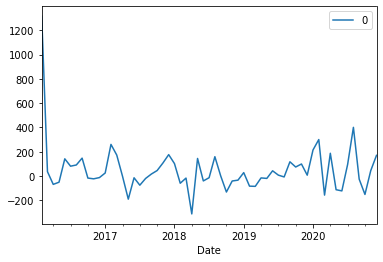

In [59]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

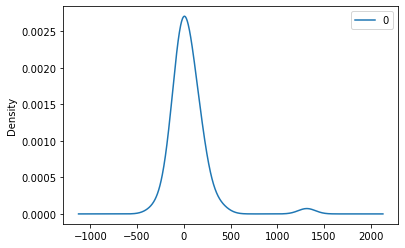

In [60]:
residuals.plot(kind='kde')
plt.show()

predicted=2401.939754, expected=2457.700004
predicted=2442.417687, expected=2858.380917
predicted=2952.259066, expected=2832.354537
predicted=2902.747114, expected=2680.500035
predicted=2724.218840, expected=2724.378958
predicted=2630.459281, expected=2894.372725
Test RMSE: 227.140


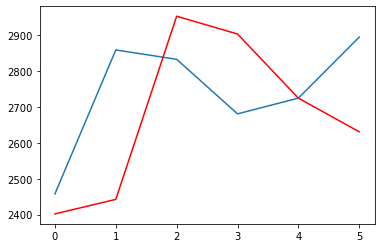

In [61]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore") 
X = series.values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# *CAPM*

Text(0, 0.5, 'daily returns')

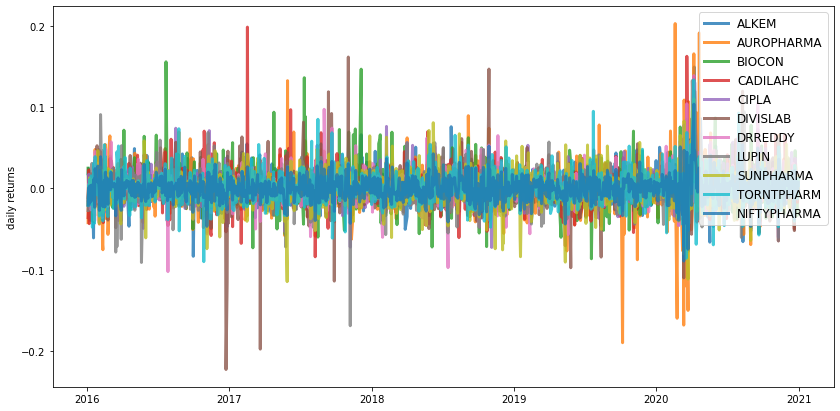

In [26]:
# pct_daily_returns.shape[0]/5

plt.figure(figsize=(14, 7))
for c in log_returns.columns.values:
    plt.plot(log_returns.index, log_returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

APR=Annual percentage return, not considering compounding

In [27]:
#annual percentage rreturn, doesnot take compound

APR = log_returns.groupby([log_returns.index.year]).agg('sum')
APR_avg = APR.mean()
APR

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Date,,,,,,,,,,,
2016,0.121131,-0.212436,0.650259,0.117347,-0.111448,-0.327748,0.019964,-0.165478,-0.223018,-0.068724,-0.137284
2017,0.332672,0.077929,0.608368,0.259884,0.093957,0.434821,-0.198889,-0.477010,-0.052369,0.113096,-0.047058
2018,-0.092062,0.114687,0.215002,-0.170451,-0.123615,0.350344,0.128268,-0.005048,-0.221273,0.257366,-0.058644
2019,0.052941,-0.402377,-0.024268,-0.275518,-0.057928,0.253677,0.118064,-0.069517,0.055645,0.072842,-0.082605
2020,0.436960,0.889239,0.534941,0.714278,0.616278,0.802783,0.655249,0.324204,0.388183,0.491636,0.521604


In [28]:
pd.DataFrame(APR_avg, columns = ['Average APR']).T*100

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Average APR,17.032854,9.340839,39.686036,12.910802,8.344863,30.277531,14.453092,-7.856973,-1.056661,17.32433,3.92027


In [29]:
log_returns.shape[0]/5

245.2

In [30]:
STD = log_returns.groupby([log_returns.index.year]).agg('std') * np.sqrt(244)
STD_avg = STD.mean()
STD

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Date,,,,,,,,,,,
2016,0.286023,0.354672,0.319083,0.310252,0.246464,0.351184,0.266182,0.317237,0.264365,0.307203,0.184378
2017,0.248917,0.319137,0.401973,0.365279,0.229397,0.436950,0.276786,0.279615,0.300310,0.279319,0.189297
2018,0.245039,0.321768,0.338864,0.309624,0.263030,0.320018,0.308797,0.290618,0.349920,0.266097,0.213265
2019,0.202977,0.368279,0.298464,0.281106,0.224936,0.262730,0.220069,0.251029,0.320064,0.247702,0.176697
2020,0.355086,0.608918,0.383615,0.414973,0.392093,0.368248,0.350680,0.394429,0.381143,0.386629,0.304768


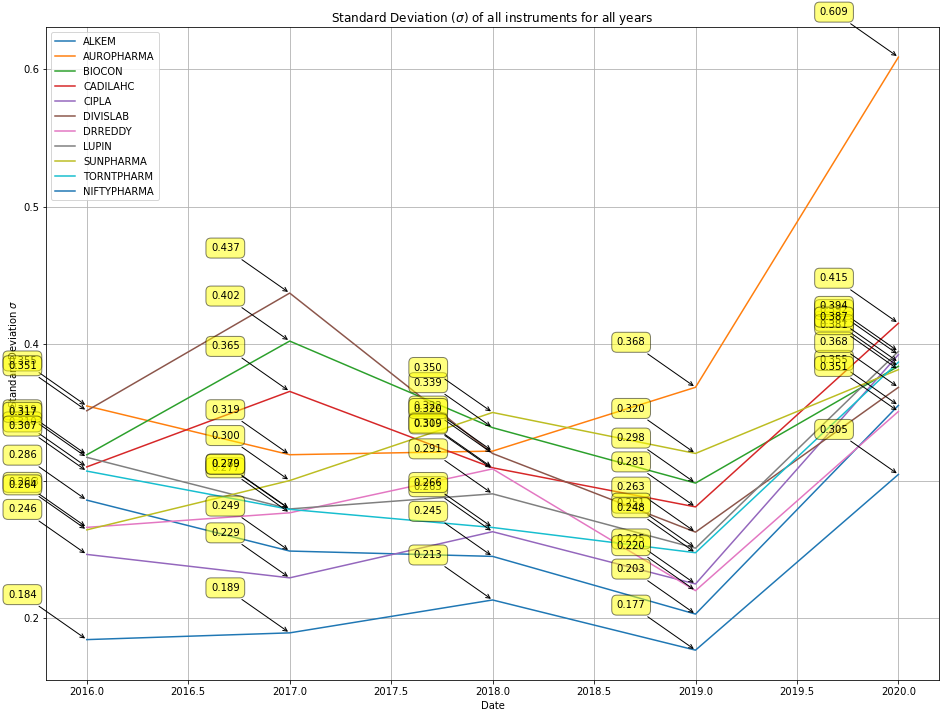

In [31]:
fig, ax = plt.subplots(figsize = (16,12))
ax.set_title(r"Standard Deviation ($\sigma$) of all instruments for all years")
# ax.set_facecolor((0.95, 0.95, 0.99))
# ax.grid(c = (0.75, 0.75, 0.99))
ax.set_ylabel(r"Standard Deviation $\sigma$")
ax.set_xlabel(r"Years")
STD.plot(ax = plt.gca(),grid = True)
for instr in STD:
    stds = STD[instr]
    years = list(STD.index)
    for year, std in zip(years, stds):
        label = "%.3f"%std
        plt.annotate(label, xy = (year, std), xytext=((-1)*50,   40),textcoords = 'offset points', ha = 'right', va='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [32]:
tr_days_per_year = df['ALKEM'].groupby([df['ALKEM'].index.year]).agg('count')
tr_days_per_year = pd.DataFrame([tr_days_per_year], index = ["All instruments (merged)"])

In [33]:
N = np.array(tr_days_per_year.T)
N_total = np.sum(N)
APY = (1  + APR / N )**N - 1 #annula percentage yeild, takes compound
APY_avg = (1  + APR_avg /N_total  )**N_total - 1

In [34]:
tr_days_per_year

Date,2016,2017,2018,2019,2020
All instruments (merged),245,246,245,242,249


In [35]:
VAR = STD **2
VAR_avg = VAR.mean()

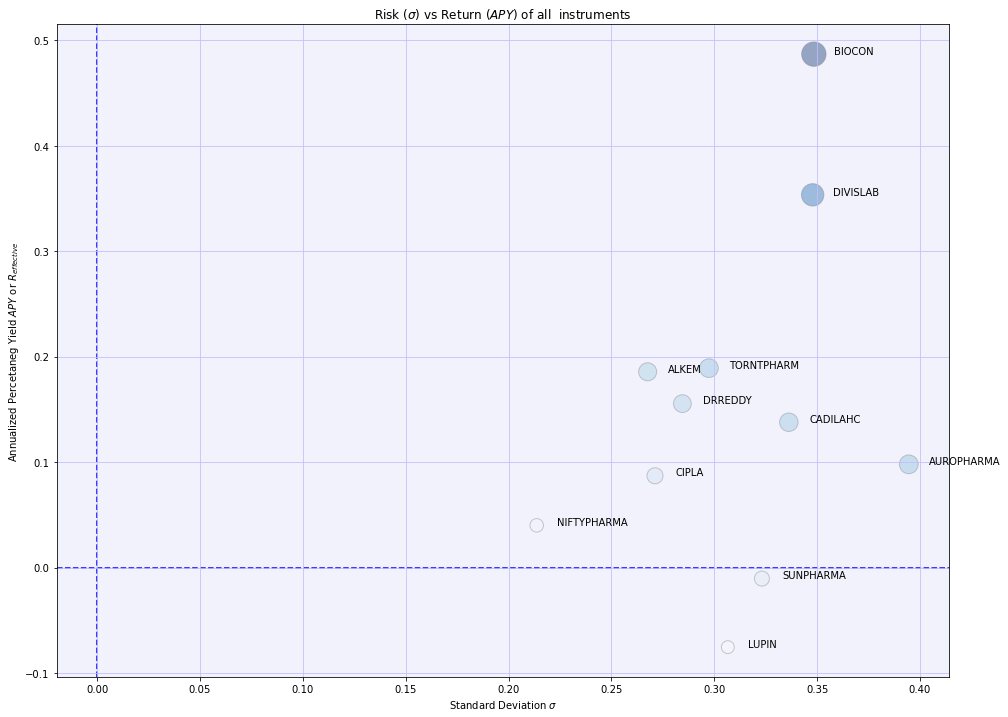

In [36]:
# configuration - generate different colors & sizes
c = [y + x for y, x in zip(APY_avg, STD_avg)]

c = list(map(lambda x : x /max(c), c))

s = list(map(lambda x : x * 600, c))# plot
fig, ax = plt.subplots(figsize = (16,12))
ax.set_title(r"Risk ($\sigma$) vs Return ($APY$) of all  instruments")
ax.set_facecolor((0.95, 0.95, 0.99))
ax.grid(c = (0.75, 0.75, 0.99))
ax.set_xlabel(r"Standard Deviation $\sigma$")
ax.set_ylabel(r"Annualized Percetaneg Yield $APY$ or $R_{effective}$")
ax.scatter(STD_avg, APY_avg, s = s , c = c , cmap = "Blues", alpha = 0.4, edgecolors="grey")

ax.axhline(y = 0.0,xmin = 0 ,xmax = 5,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')
ax.axvline(x = 0.0,ymin = 0 ,ymax = 40,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')
for idx, instr in enumerate(list(STD.columns)):
    ax.annotate(instr, (STD_avg[idx] + 0.01, APY_avg[idx]))

In [37]:

instruments = list(log_returns.columns)
instruments

['ALKEM',
 'AUROPHARMA',
 'BIOCON',
 'CADILAHC',
 'CIPLA',
 'DIVISLAB',
 'DRREDDY',
 'LUPIN',
 'SUNPHARMA',
 'TORNTPHARM',
 'NIFTYPHARMA']

In [38]:
def visualize_statistic(statistic, title, limit = 0):
  # configuration
  fig, ax = plt.subplots(figsize = (12,8))
  ax.set_facecolor((0.95, 0.95, 0.99))
  ax.grid(c = (0.75, 0.75, 0.99), axis = 'y')
  colors = sns.color_palette('Reds', n_colors = len(statistic))
  # visualize
  barlist = ax.bar(x = np.arange(len(statistic)), height =  statistic)
  for b, c in zip(barlist, colors):
    b.set_color(c)
  ax.axhline(y = limit, xmin = -1 ,xmax = 1,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')

  # configure more
  for i, v in enumerate(statistic):
      ax.text( i - 0.22,v + 0.01 , str(round(v,3)), color = 'blue', fontweight='bold')
  plt.xticks(np.arange(len(statistic)), instruments)
  plt.title(r"{}for every instrument (i) against market (m) Index".format(title))
  plt.xlabel(r"Instrument")
  plt.ylabel(r"{} value".format(title))
  plt.show()

In [39]:


def visualize_model(alpha, beta, data, model):
  fig, axs = plt.subplots(4,3, figsize = (14,10),  constrained_layout = True)
  # fig.tight_layout()
  idx = 0
  R_m = data["NIFTYPHARMA"]
  del data["NIFTYPHARMA"]
  for a, b, instr in zip(alpha, beta, data):
    i, j = int(idx / 3), idx % 3
    axs[i, j].set_title("Model : {} fitted for '{}'".format(model, instr))
    axs[i, j].set_facecolor((0.95, 0.95, 0.99))
    axs[i, j].grid(c = (0.75, 0.75, 0.99))
    axs[i, j].set_xlabel(r"Index log returns")
    axs[i, j].set_ylabel(r"{} log returns".format(instr))
    
    R = data[instr]
    y = a + b * R_m
    axs[i, j].scatter(x = R_m, y = R, label = 'Returns'.format(instr))
    axs[i, j].plot(R_m, y ,color = 'red', label = 'CAPM model')
    idx += 1



In [40]:
risk_free=0.02
log_returns.head()

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Date,,,,,,,,,,,
2016-01-04,0.017996,-0.042092,0.024942,-0.035768,-0.014801,-0.011011,-0.016921,-0.027151,-0.020170,-0.020657,-0.020547
2016-01-05,0.024540,0.022741,-0.000094,-0.022444,-0.007434,-0.001914,0.004794,-0.006740,0.001752,-0.008561,0.000665
2016-01-06,-0.025962,0.004285,-0.019470,0.022800,0.017555,-0.008976,-0.007946,-0.016741,-0.010681,0.004805,-0.005766
2016-01-07,-0.039064,-0.029636,-0.023771,-0.043336,-0.022466,-0.009013,-0.017874,-0.020363,-0.010291,-0.012371,-0.019030
2016-01-08,0.006713,0.003743,0.013397,0.011243,-0.023688,0.002440,0.006317,-0.002707,0.013205,0.010947,0.003052


In [41]:
APR_total = log_returns.groupby([log_returns.index.year]).agg('sum')
APR_total

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Date,,,,,,,,,,,
2016,0.121131,-0.212436,0.650259,0.117347,-0.111448,-0.327748,0.019964,-0.165478,-0.223018,-0.068724,-0.137284
2017,0.332672,0.077929,0.608368,0.259884,0.093957,0.434821,-0.198889,-0.477010,-0.052369,0.113096,-0.047058
2018,-0.092062,0.114687,0.215002,-0.170451,-0.123615,0.350344,0.128268,-0.005048,-0.221273,0.257366,-0.058644
2019,0.052941,-0.402377,-0.024268,-0.275518,-0.057928,0.253677,0.118064,-0.069517,0.055645,0.072842,-0.082605
2020,0.436960,0.889239,0.534941,0.714278,0.616278,0.802783,0.655249,0.324204,0.388183,0.491636,0.521604


In [42]:

APR_avg_total     = APR_total.mean()
APR_avg_market    = APR_avg_total['NIFTYPHARMA']

# RISK
STD_total = log_returns.groupby([log_returns.index.year]).agg('std') * np.sqrt(N)
STD_avg_total     = STD_total.mean()
STD_avg_market    = STD_avg_total['NIFTYPHARMA']

corr = log_returns.corrwith(log_returns['NIFTYPHARMA'])
r_squared = corr ** 2

In [43]:
APR_avg

ALKEM          0.170329
AUROPHARMA     0.093408
BIOCON         0.396860
CADILAHC       0.129108
CIPLA          0.083449
DIVISLAB       0.302775
DRREDDY        0.144531
LUPIN         -0.078570
SUNPHARMA     -0.010567
TORNTPHARM     0.173243
NIFTYPHARMA    0.039203
dtype: float64

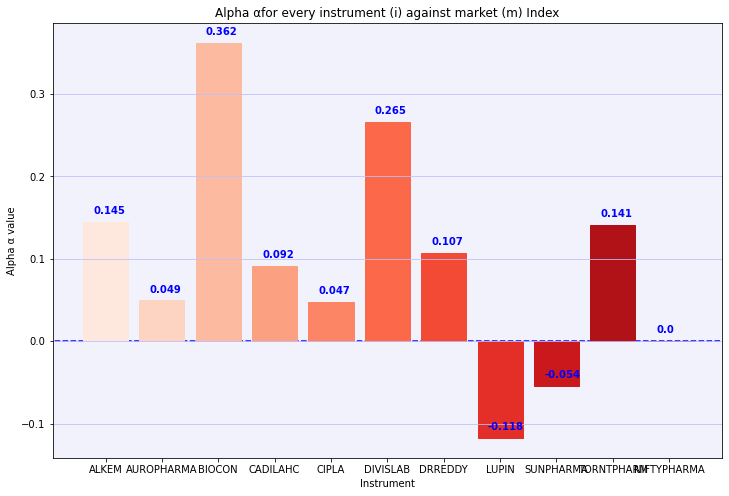

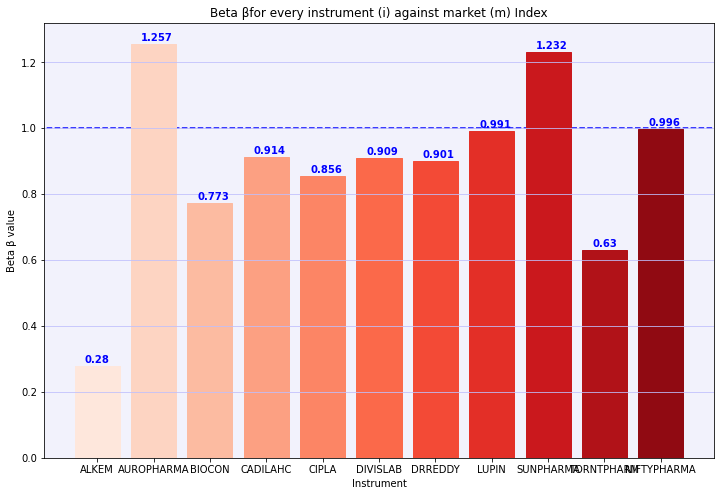

In [44]:
import seaborn as sns
def CAPM():
    # 1 - Calculate average Risk Premium for every instrument
    # [*]  _
    #     E[R] - R_f
    # [*]   __
    #     E[R_m] - R_f
    APR_premium        = APR_avg - risk_free
    APR_market_premium = APR_avg_market - risk_free    # 2- Calculate α, β
    beta  = corr *  STD_avg / STD_avg_market
    alpha = APR_premium - beta * APR_market_premium
    
    return alpha, beta
alpha, beta = CAPM()
visualize_statistic(alpha.values, "Alpha α")
visualize_statistic(beta.values, "Beta β", limit = 1)

In [45]:

pd.DataFrame(beta,  columns = ["Average β"]).T

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Average β,0.279957,1.256583,0.773094,0.913736,0.855991,0.90941,0.900503,0.991472,1.232335,0.629992,0.996299


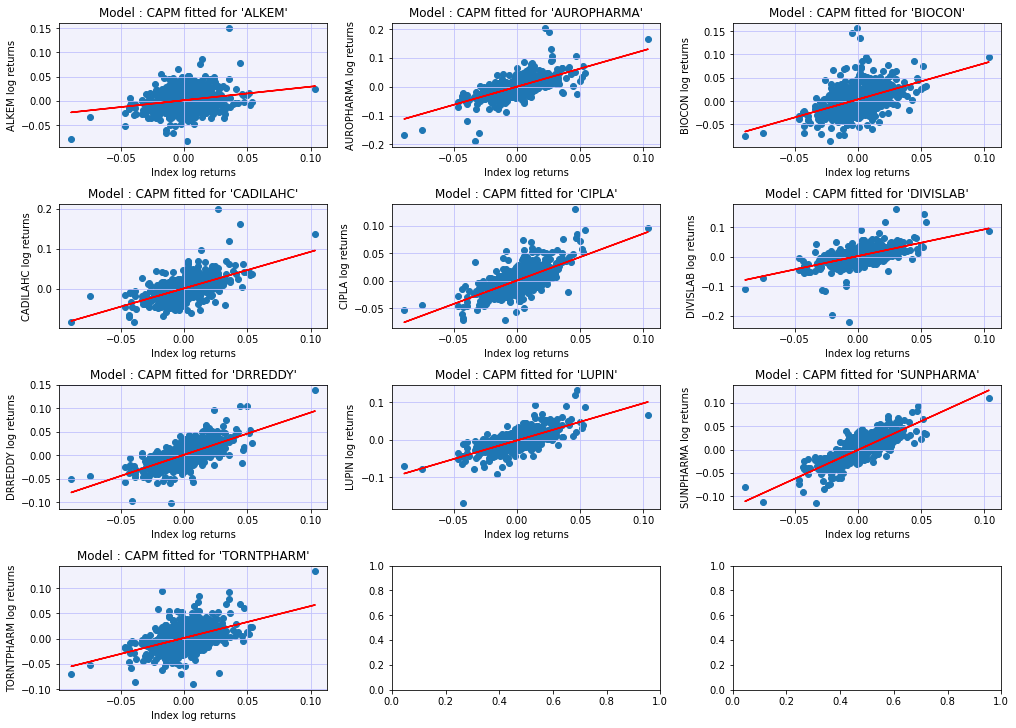

In [46]:
visualize_model(alpha/100, beta, data = log_returns.copy(), model = 'CAPM')

In [90]:
# 

In [47]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 245
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix,
                                           weights))) * np.sqrt(245)
    return std, returns


def random_portfolios(num_portfolios, mean_returns, cov_matrix,
                      risk_free_rate):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(data.columns))
        weights = weights / (np.sum(weights))
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(
            weights, mean_returns, cov_matrix)
        results[0, i] = portfolio_std_dev
        results[1, i] = portfolio_return
        results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [48]:
log_stocks=log_returns.iloc[:,:10]
mean_returns = log_stocks.mean()
cov_matrix = log_stocks.cov()
data = log_stocks.copy()
num_portfolios = 100000
risk_free_rate = 0.02

In [150]:

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    print(results)
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-------------------------")
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Return:", round(rp,2))
    print(" Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-------------------------")
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel(' volatility')
    plt.ylabel(' returns')
    plt.legend(labelspacing=0.8)

## Applying CAPM on all NIFTY PHARMA stocks

-------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 0.27
 Volatility: 0.22


            ALKEM  AUROPHARMA  BIOCON  CADILAHC  CIPLA  DIVISLAB  DRREDDY  \
allocation  19.42        1.09   43.27      0.88   0.56     11.81     1.89   

            LUPIN  SUNPHARMA  TORNTPHARM  
allocation   3.07       3.11       14.89  
-------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.13
Annualised Volatility: 0.19


            ALKEM  AUROPHARMA  BIOCON  CADILAHC  CIPLA  DIVISLAB  DRREDDY  \
allocation  26.29        1.69    4.35      2.18  21.99      1.94    10.64   

            LUPIN  SUNPHARMA  TORNTPHARM  
allocation   4.87       8.66       17.39  


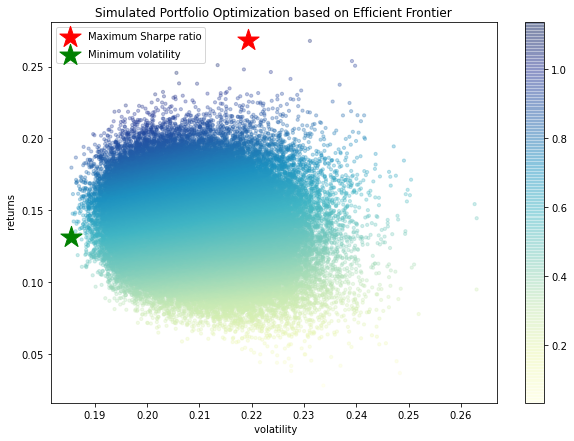

In [50]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [101]:

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Using Autoencoders to reduce dimension of Data

In [158]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

from keras.layers import Input, Dense,LeakyReLU
from keras.models import Model
from keras import regularizers
from keras.models import load_model
from sklearn.preprocessing import StandardScaler  
from collections import defaultdict

In [52]:
stock = defaultdict(defaultdict)

In [53]:
stocks=df.iloc[:,:10]
stocks.shape

(1227, 10)

In [54]:
stocks_weekly=stocks.resample('W').mean()
stocks_weekly.head()

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM
Date,,,,,,,,,,
2016-01-03,1503.099976,881.400024,86.866669,332.700012,655.349976,1162.500000,3108.600098,1845.250000,815.549988,1478.900024
2016-01-10,1513.879980,852.230005,87.384999,314.459998,639.679993,1138.209961,3035.079980,1752.350000,793.900000,1438.549976
2016-01-17,1446.640015,830.859998,85.673334,316.119995,610.709998,1089.759985,2919.319971,1697.159985,789.189990,1395.740015
2016-01-24,1346.640015,801.450000,80.791666,301.730005,588.880005,1067.619971,2859.990039,1700.100024,786.760010,1348.480005
2016-01-31,1351.312500,815.787506,82.097915,302.825004,580.999985,1125.349976,2998.212463,1701.325012,833.875015,1394.475006


In [55]:
stock_net=stocks_weekly.pct_change(axis=0,periods=1).iloc[1:,:]

In [56]:
stock_net.dropna(inplace=True)

In [57]:
stock_net=stock_net*100

In [58]:
stock['calibrate']['return'] = stock_net.iloc[0:131, :]
stock['validate']['return'] = stock_net.iloc[131:, :]

In [59]:
stocks_weekly.shape

(262, 10)

In [60]:
encoding_dim = 5 # 5 neurons
num_stock = len(stocks.columns) # Use 10 stocks as features

input_stocks = Input(shape=(num_stock, ))
input_stocks
# connect all layers
 # see 'Stacked Auto-Encoders' in paper

encoded = Dense(encoding_dim, kernel_regularizer=regularizers.l2(0.0008))(input_stocks)
encoded = LeakyReLU(alpha=0.05)(encoded)
decoded = Dense(num_stock, activation= 'linear', kernel_regularizer=regularizers.l2(0.0001))(encoded) # see 'Stacked Auto-Encoders' in paper

In [61]:

# construct and compile AE model
autoencoder = Model(input_stocks, decoded)
autoencoder.compile(optimizer='sgd', loss='mean_squared_error')

# train autoencoder
data_auto = stock['calibrate']['return']

autoencoder.fit(data_auto, data_auto, shuffle=False, epochs=300, batch_size = 20)
autoencoder.save('retrack_autoencoder.h5')

# test/reconstruct market information matrix
reconstruct = autoencoder.predict(data_auto)

Epoch 1/300
7/7 [==============================] - 12s 1ms/step - loss: 14.2512
Epoch 2/300
7/7 [==============================] - 0s 665us/step - loss: 11.8854
Epoch 3/300
7/7 [==============================] - 0s 995us/step - loss: 10.5575
Epoch 4/300
7/7 [==============================] - 0s 665us/step - loss: 9.5195
Epoch 5/300
7/7 [==============================] - 0s 663us/step - loss: 8.6618
Epoch 6/300
7/7 [==============================] - 0s 831us/step - loss: 7.9681
Epoch 7/300
7/7 [==============================] - 0s 831us/step - loss: 7.4163
Epoch 8/300
7/7 [==============================] - 0s 665us/step - loss: 7.0009
Epoch 9/300
7/7 [==============================] - 0s 499us/step - loss: 6.6968
Epoch 10/300
7/7 [==============================] - 0s 665us/step - loss: 6.4748
Epoch 11/300
7/7 [==============================] - 0s 665us/step - loss: 6.3077
Epoch 12/300
7/7 [==============================] - 0s 499us/step - loss: 6.1785
Epoch 13/300
7/7 [=================

7/7 [==============================] - 0s 665us/step - loss: 4.0206
Epoch 203/300
7/7 [==============================] - 0s 665us/step - loss: 4.0192
Epoch 204/300
7/7 [==============================] - 0s 665us/step - loss: 4.0177
Epoch 205/300
7/7 [==============================] - 0s 665us/step - loss: 4.0163
Epoch 206/300
7/7 [==============================] - 0s 499us/step - loss: 4.0150
Epoch 207/300
7/7 [==============================] - 0s 665us/step - loss: 4.0136
Epoch 208/300
7/7 [==============================] - 0s 499us/step - loss: 4.0123
Epoch 209/300
7/7 [==============================] - 0s 499us/step - loss: 4.0110
Epoch 210/300
7/7 [==============================] - 0s 563us/step - loss: 4.0097
Epoch 211/300
7/7 [==============================] - 0s 493us/step - loss: 4.0082
Epoch 212/300
7/7 [==============================] - 0s 499us/step - loss: 4.0066
Epoch 213/300
7/7 [==============================] - 0s 499us/step - loss: 4.0051
Epoch 214/300
7/7 [===========

In [62]:
which_stock = 3



stock_autoencoder = []
stock_actual =[]


return_autoencoded = copy.deepcopy(reconstruct[0:131, which_stock])
return_actual= copy.deepcopy(data_auto.iloc[0:131,which_stock])

<AxesSubplot:>

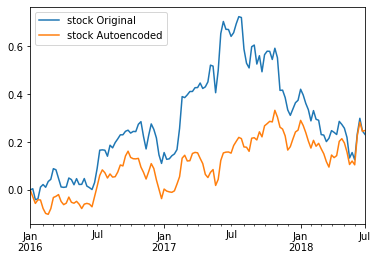

In [63]:
n_train=131
return_autoencoded[0] = 0
return_actual[0]= 0
for i in range(1,n_train):
    return_autoencoded[i]=(1+(return_autoencoded[i]/100))*(return_autoencoded[i-1]+1)-1
    return_actual[i]=(1+(return_actual[i]/100))*(return_actual[i-1]+1)-1
stock_actual = return_actual.tolist()
## plot for comparison
pd.Series(stock_actual, index=pd.date_range(start='01/01/2016', periods=131, freq='W')).plot(label='stock Original', legend=True)
pd.Series(return_autoencoded, index=pd.date_range(start='01/01/2016', periods = 131, freq='W')).plot(label='stock Autoencoded', legend=True)

In [65]:
communal_information = []
for i in range(0,num_stock):
    diff = np.linalg.norm((data_auto.iloc[:,i] - reconstruct[:,i]))
    communal_information.append(float(diff))


In [160]:
data = stock['calibrate']['return']
data=data/100
data= data+1
data=np.log(data)
ranking

array([2, 5, 4, 8, 3, 0, 7, 9, 1, 6], dtype=int64)

## Autoencoders give out the normal differences

In [161]:
stock['autoencoder']['return']=stock_net.iloc[:, :]
print("stock #, 2-norm, stock name")
ranking = np.array(communal_information).argsort()
for stock_index in ranking:
    print(stock_index, communal_information[stock_index], stock['autoencoder']['return'].iloc[:,stock_index].name)

stock #, 2-norm, stock name
2 12.722653794064884 BIOCON
5 14.080240901045858 DIVISLAB
4 19.72183225994508 CIPLA
8 22.277879296828306 SUNPHARMA
3 22.622793168783073 CADILAHC
0 23.053725249704126 ALKEM
7 23.177199120602975 LUPIN
9 25.179766144431632 TORNTPHARM
1 25.240034552834587 AUROPHARMA
6 26.387910677799656 DRREDDY


In [162]:
ranking

array([2, 5, 4, 8, 3, 0, 7, 9, 1, 6], dtype=int64)

In [163]:
num_stock

10

In [164]:
data.iloc[:,0].name

'ALKEM'

In [165]:
rank= ranking.copy() 
rank= rank[5:num_stock]
print(rank)
for i in rank:
    data.drop([data.iloc[:,i].name], axis=1, inplace=True)
    for k in range(len(rank)):
        if(rank[k]>i-1):
            rank[k]=rank[k]-1
            

[0 7 9 1 6]


In [94]:
rank

array([-1,  3,  4, -1,  3], dtype=int64)

In [106]:
rank

array([-1,  3,  4, -1,  3], dtype=int64)

In [107]:
index=df.iloc[:,10]
# index['change']=index['NIFTYPHARMA'].shift(1)

In [108]:
index=pd.DataFrame(index)

In [109]:
index['change']=index.shift(1)

In [110]:
index['Net Change']=index['NIFTYPHARMA']-index['change']

In [111]:
index=index.drop(['change'],axis=1)
index['Percentage change']=index['NIFTYPHARMA'].pct_change()*100

In [112]:
index.dropna(inplace=True)

In [113]:
index

,NIFTYPHARMA,Net Change,Percentage change
Date,,,
2016-01-04,11733.70,-246.15,-2.054700
2016-01-05,11741.50,7.80,0.066475
2016-01-06,11673.80,-67.70,-0.576587
2016-01-07,11451.65,-222.15,-1.902979
2016-01-08,11486.60,34.95,0.305196
...,...,...,...
2020-12-24,12908.95,155.70,1.220865
2020-12-28,12874.35,-34.60,-0.268031
2020-12-29,12843.90,-30.45,-0.236517


In [114]:
index=index.resample('W').mean()
index

,NIFTYPHARMA,Net Change,Percentage change
Date,,,
2016-01-10,11617.4500,-98.6500,-0.832519
2016-01-17,11318.6300,-45.3700,-0.395019
2016-01-24,11094.5400,-23.6900,-0.196115
2016-01-31,11446.1875,153.6375,1.354571
2016-02-07,11476.0600,-20.6900,-0.152744
...,...,...,...
2020-12-06,12173.5750,128.6125,1.070276
2020-12-13,12442.7500,2.4800,0.024580
2020-12-20,12560.9500,79.2700,0.634232


In [115]:
NSE = defaultdict(defaultdict)


NSE_lp = index.iloc[:, 0]  # Series
NSE['calibrate']['lp'] = NSE_lp[0:131]
NSE['validate']['lp'] = NSE_lp[131:]

NSE_net = index.iloc[:, 1]  # Series
NSE['calibrate']['net'] =NSE_net[0:131]
NSE['validate']['net'] = NSE_net[131:]

NSE_percentage = index.iloc[:, 2]  # Series
NSE['calibrate']['return'] = NSE_percentage[0:131]
NSE['validate']['return'] = NSE_percentage[131:]

In [116]:

nse_predict = defaultdict(defaultdict)
total_2_norm_diff = defaultdict(defaultdict)

dl_scaler = defaultdict(StandardScaler)
port =np.array([1,3,5,7,9])

for non_communal in port:  
    # some numerical values
    encoding_dim = 10
    s = 10 + non_communal
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:])) # portfolio index
    
    
    # connect all layers
    stock_input = Input(shape=(s,))
    encoded = Dense(encoding_dim, kernel_regularizer=regularizers.l2(0.0008))(stock_input)
    encoded = LeakyReLU(alpha=0.3)(encoded)
    decoded = Dense(1, activation= 'linear', kernel_regularizer=regularizers.l2(0.0001))(encoded)
    
    
    # construct and compile deep learning routine
    deep_learner = Model(stock_input, decoded)
    deep_learner.compile(optimizer='sgd', loss='mean_squared_error')
    
    x = stock['calibrate']['return'].iloc[:, stock_index]
    y = NSE['calibrate']['return']
    
    dl_scaler[s] = StandardScaler()       # Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data
    dl_scaler[s].fit(x)
    x = dl_scaler[s].transform(x)  
    
    deep_learner.fit(x, y, shuffle=False, epochs=200, batch_size = 15)    # fit the model
    deep_learner.save('retrack_s' + str(s) + '.h5') # for validation phase use
    
    nse_autoencoded = copy.deepcopy(deep_learner.predict(x))
    nse_autoencoded[0] = 0
    nse_autoencoded = nse_autoencoded/100 + 1
    nse_actual = copy.deepcopy(NSE_percentage[0:131])
    nse_actual[0] = 0
    for i in range(1,n_train):
        nse_actual[i]=(1+(nse_actual[i]/100))*(nse_actual[i-1]+1)-1
    nse_actual = nse_actual.tolist()
    nse_predict['calibrate'][s] = (nse_actual[0]+1) * (nse_autoencoded.cumprod())-1          
    total_2_norm_diff['calibrate'][s] = np.linalg.norm((nse_predict['calibrate'][s] - nse_actual))

Epoch 1/200
9/9 [==============================] - 2s 4ms/step - loss: 3.0988
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 0.7659
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.4430
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3462
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3037
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2793
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2627
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2505
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2407
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2327
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2258
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2197
Epoch 13/200
9/9 [==============================] - 0s 3ms/st

9/9 [==============================] - 0s 2ms/step - loss: 0.2479
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2371
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2284
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2213
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2153
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2102
Epoch 12/200
9/9 [==============================] - 0s 12ms/step - loss: 0.2058
Epoch 13/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2019
Epoch 14/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1985
Epoch 15/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1954
Epoch 16/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1926
Epoch 17/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1899
Epoch 18/200
9/9 [==============================] - 0s 2ms/step - l

9/9 [==============================] - 0s 2ms/step - loss: 0.2359
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2300
Epoch 13/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2249
Epoch 14/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2203
Epoch 15/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2163
Epoch 16/200
9/9 [==============================] - 0s 1ms/step - loss: 0.2127
Epoch 17/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2093
Epoch 18/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2061
Epoch 19/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2033
Epoch 20/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2005
Epoch 21/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1977
Epoch 22/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 23/200
9/9 [==============================] - 0s 2ms/step -

9/9 [==============================] - 0s 997us/step - loss: 0.1778
Epoch 17/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1749
Epoch 18/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1723
Epoch 19/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1699
Epoch 20/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1677
Epoch 21/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1656
Epoch 22/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1637
Epoch 23/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1618
Epoch 24/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1601
Epoch 25/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1584
Epoch 26/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1569
Epoch 27/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1554
Epoch 28/200
9/9 [==============================] - 0s 1ms/step

9/9 [==============================] - 0s 2ms/step - loss: 0.1502
Epoch 22/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1492
Epoch 23/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1482
Epoch 24/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1473
Epoch 25/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1464
Epoch 26/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1455
Epoch 27/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1447
Epoch 28/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1438
Epoch 29/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1432
Epoch 30/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1423
Epoch 31/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1416
Epoch 32/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1410
Epoch 33/200
9/9 [==============================] - 0s 2ms/step -

In [117]:
ranking

array([2, 5, 4, 8, 3, 0, 7, 9, 1, 6], dtype=int64)

S11 2-norm difference:  0.08745104448320874
S13 2-norm difference:  0.052088241344322425
S15 2-norm difference:  0.23327010302397216
S17 2-norm difference:  0.21988538406439528
S19 2-norm difference:  0.10599189654804468


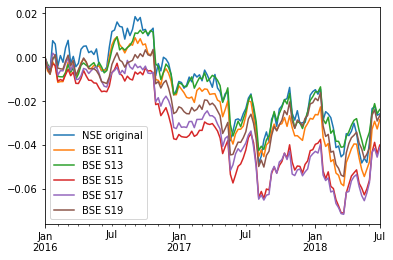

In [124]:
pd.Series(nse_actual, index=pd.date_range(start='01/01/2016', periods=131, freq='W')).plot(label='NSE original', legend=True)

for s in [11,13,15,17,19]:
    pd.Series(nse_predict['calibrate'][s], index=pd.date_range(start='01/01/2016', periods = 131,freq='W')).plot(label='BSE S'+str(s), legend=True)
    print("S" +str(s) + " 2-norm difference: ", total_2_norm_diff['calibrate'][s])

In [135]:
ranking

array([2, 5, 4, 8, 3, 0, 7, 9, 1, 6], dtype=int64)

In [136]:
log_returns

,ALKEM,AUROPHARMA,BIOCON,CADILAHC,CIPLA,DIVISLAB,DRREDDY,LUPIN,SUNPHARMA,TORNTPHARM,NIFTYPHARMA
Date,,,,,,,,,,,
2016-01-04,0.017996,-0.042092,0.024942,-0.035768,-0.014801,-0.011011,-0.016921,-0.027151,-0.020170,-0.020657,-0.020547
2016-01-05,0.024540,0.022741,-0.000094,-0.022444,-0.007434,-0.001914,0.004794,-0.006740,0.001752,-0.008561,0.000665
2016-01-06,-0.025962,0.004285,-0.019470,0.022800,0.017555,-0.008976,-0.007946,-0.016741,-0.010681,0.004805,-0.005766
2016-01-07,-0.039064,-0.029636,-0.023771,-0.043336,-0.022466,-0.009013,-0.017874,-0.020363,-0.010291,-0.012371,-0.019030
2016-01-08,0.006713,0.003743,0.013397,0.011243,-0.023688,0.002440,0.006317,-0.002707,0.013205,0.010947,0.003052
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.015621,0.022152,-0.003412,0.030526,0.010368,0.016537,-0.004269,0.013339,0.027584,-0.005108,0.012209
2020-12-28,0.000309,-0.000715,-0.033510,-0.003677,-0.003661,0.004374,0.000000,0.007734,-0.005928,0.003536,-0.002680
2020-12-29,0.002880,-0.003633,-0.011378,-0.017121,-0.002650,0.004833,-0.006959,-0.006607,0.006219,-0.013022,-0.002365


## Using MTP on  5 stocks with least normal difference in Autoencoders

In [166]:
log_stocks=log_returns.iloc[:,[2, 5, 4, 8, 3]]
mean_returns = log_stocks.mean()
cov_matrix = log_stocks.cov()
data = log_stocks.copy()
num_portfolios = 50000
risk_free_rate = 0.02

[[0.23372803 0.23760847 0.23256755 ... 0.23295155 0.2350917  0.23124931]
 [0.17933191 0.17877635 0.20218867 ... 0.13032318 0.11330612 0.173856  ]
 [0.68169789 0.66822681 0.78337959 ... 0.47358854 0.39689246 0.66532524]]
-------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 0.36
 Volatility: 0.3


            BIOCON  DIVISLAB  CIPLA  SUNPHARMA  CADILAHC
allocation   71.99     25.64   1.03       1.28      0.05
-------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.16
Annualised Volatility: 0.22


            BIOCON  DIVISLAB  CIPLA  SUNPHARMA  CADILAHC
allocation   18.05      15.1  36.96      16.75     13.13


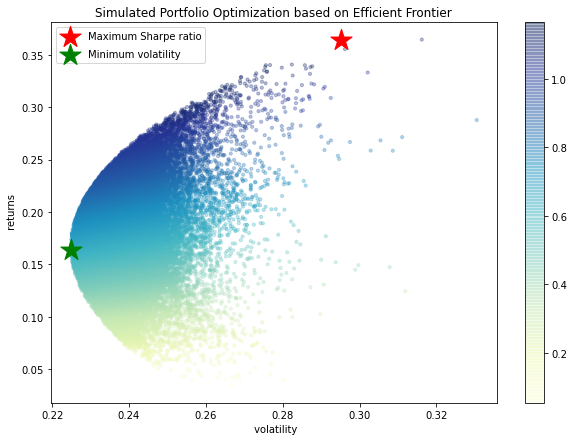

In [167]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

## Using MTP on 5 stocks with highest normal difference(stocks that didn't well by Autoencoder)

In [168]:
log_stocks=log_returns.iloc[:,[ 0, 7, 9, 1, 6]]
mean_returns = log_stocks.mean()
cov_matrix = log_stocks.cov()
data = log_stocks.copy()
num_portfolios = 50000
risk_free_rate = 0.02

[[0.21137788 0.21131259 0.19500951 ... 0.22778108 0.22168908 0.21933642]
 [0.10114603 0.0865295  0.14123692 ... 0.11403679 0.11118804 0.10967609]
 [0.38389085 0.31483926 0.62169746 ... 0.41283848 0.41133302 0.4088518 ]]
-------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 0.16
 Volatility: 0.2


            ALKEM  LUPIN  TORNTPHARM  AUROPHARMA  DRREDDY
allocation  40.07   0.57       28.21        0.36     30.8
-------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.12
Annualised Volatility: 0.19


            ALKEM  LUPIN  TORNTPHARM  AUROPHARMA  DRREDDY
allocation  38.66  18.84       18.37        1.59    22.54


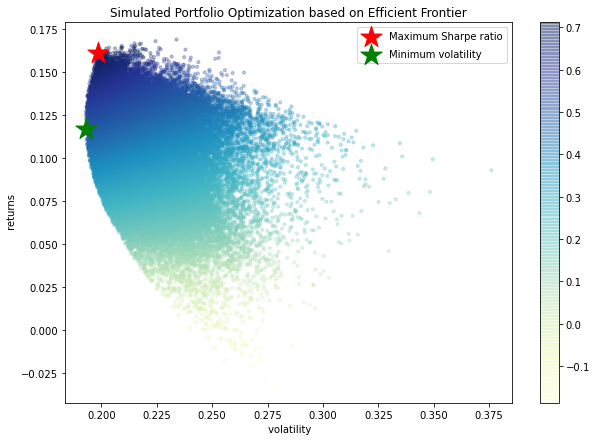

In [169]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

## Using MTP on 5 stocks with a mix of highest and lowest normal difference

In [180]:
log_stocks=log_returns.iloc[:,ranking[::2]]
mean_returns = log_stocks.mean()
cov_matrix = log_stocks.cov()
data = log_stocks.copy()
num_portfolios = 50000
risk_free_rate = 0.02

[[0.26385341 0.25516477 0.25934078 ... 0.24200708 0.25755687 0.25630044]
 [0.13048081 0.1242428  0.18221917 ... 0.19217525 0.11775359 0.07341871]
 [0.41872043 0.40853133 0.62550583 ... 0.71144715 0.37954178 0.20842222]]
-------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 0.34
 Volatility: 0.31


            BIOCON  CIPLA  CADILAHC  LUPIN  AUROPHARMA
allocation   83.05   4.02      8.91   3.16        0.86
-------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.13
Annualised Volatility: 0.23


            BIOCON  CIPLA  CADILAHC  LUPIN  AUROPHARMA
allocation    21.8   37.8     17.16   21.1        2.14


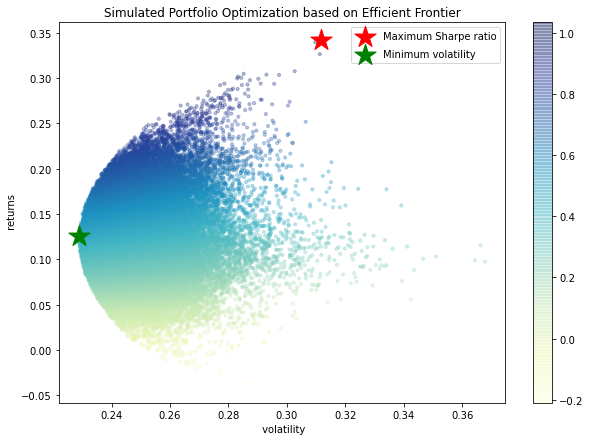

In [181]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)